In [2]:
import os
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt


base_path = Path("results/hpp_clustering/")
SUFFIX = "-stats.pt"
headers = ["n-sect", "n-sen", "min-sen", "max-sen", "avg-sim", "min-avg", "max-avg", "std-sim", "min-std", "max-std", "avg-min", "min-min", "avg-max", "max-max"]
# load stats
stats = {}
for file in os.listdir(base_path):
    if file.endswith(SUFFIX):
        stats[file[:-len(SUFFIX)]] = torch.load(base_path / file)

In [3]:
# table of stats
print(*headers, sep='\t')
for k, v in stats.items():
    print(k, end="\n")
    [print(f"{np.mean(i):0.4f}", end="\t") for i in v]
    print("")
    [print(f"{np.std(i):0.4f}", end="\t") for i in v]
    print("")


n-sect	n-sen	min-sen	max-sen	avg-sim	min-avg	max-avg	std-sim	min-std	max-std	avg-min	min-min	avg-max	max-max
pubmed_val-True-bert-kmeanspickk-cos
3.8349	20.5405	9.9552	32.4575	0.9850	0.9789	0.9900	0.0120	0.0070	0.0179	0.9405	0.9130	0.9981	0.9991	
0.4006	14.2548	8.7117	22.5855	0.0045	0.0069	0.0047	0.0128	0.0130	0.0136	0.0206	0.0309	0.0017	0.0010	
pubmed_val-True-bert-kmeanssectk-cos
5.1027	16.5609	7.3054	27.3375	0.9861	0.9800	0.9910	0.0110	0.0063	0.0169	0.9492	0.9234	0.9980	0.9991	
2.1264	12.2808	8.6561	19.0232	0.0079	0.0092	0.0080	0.0224	0.0225	0.0227	0.0356	0.0413	0.0014	0.0010	
pubmed_val-True-bert-louvain_clustering-cos
1.9431	39.8689	34.1317	45.6062	0.9744	0.9681	0.9807	0.0221	0.0173	0.0269	0.8790	0.8578	0.9988	0.9991	
0.2316	25.6451	23.0322	29.1632	0.0093	0.0096	0.0106	0.0153	0.0160	0.0155	0.0434	0.0480	0.0009	0.0010	
pubmed_val-True-bert-none-cos
5.1027	16.5609	5.0382	34.5655	0.9364	0.9084	0.9604	0.0543	0.0292	0.0747	0.7801	0.6912	0.9919	0.9988	
2.1264	12.2808	7.7627	27.1931	0.01

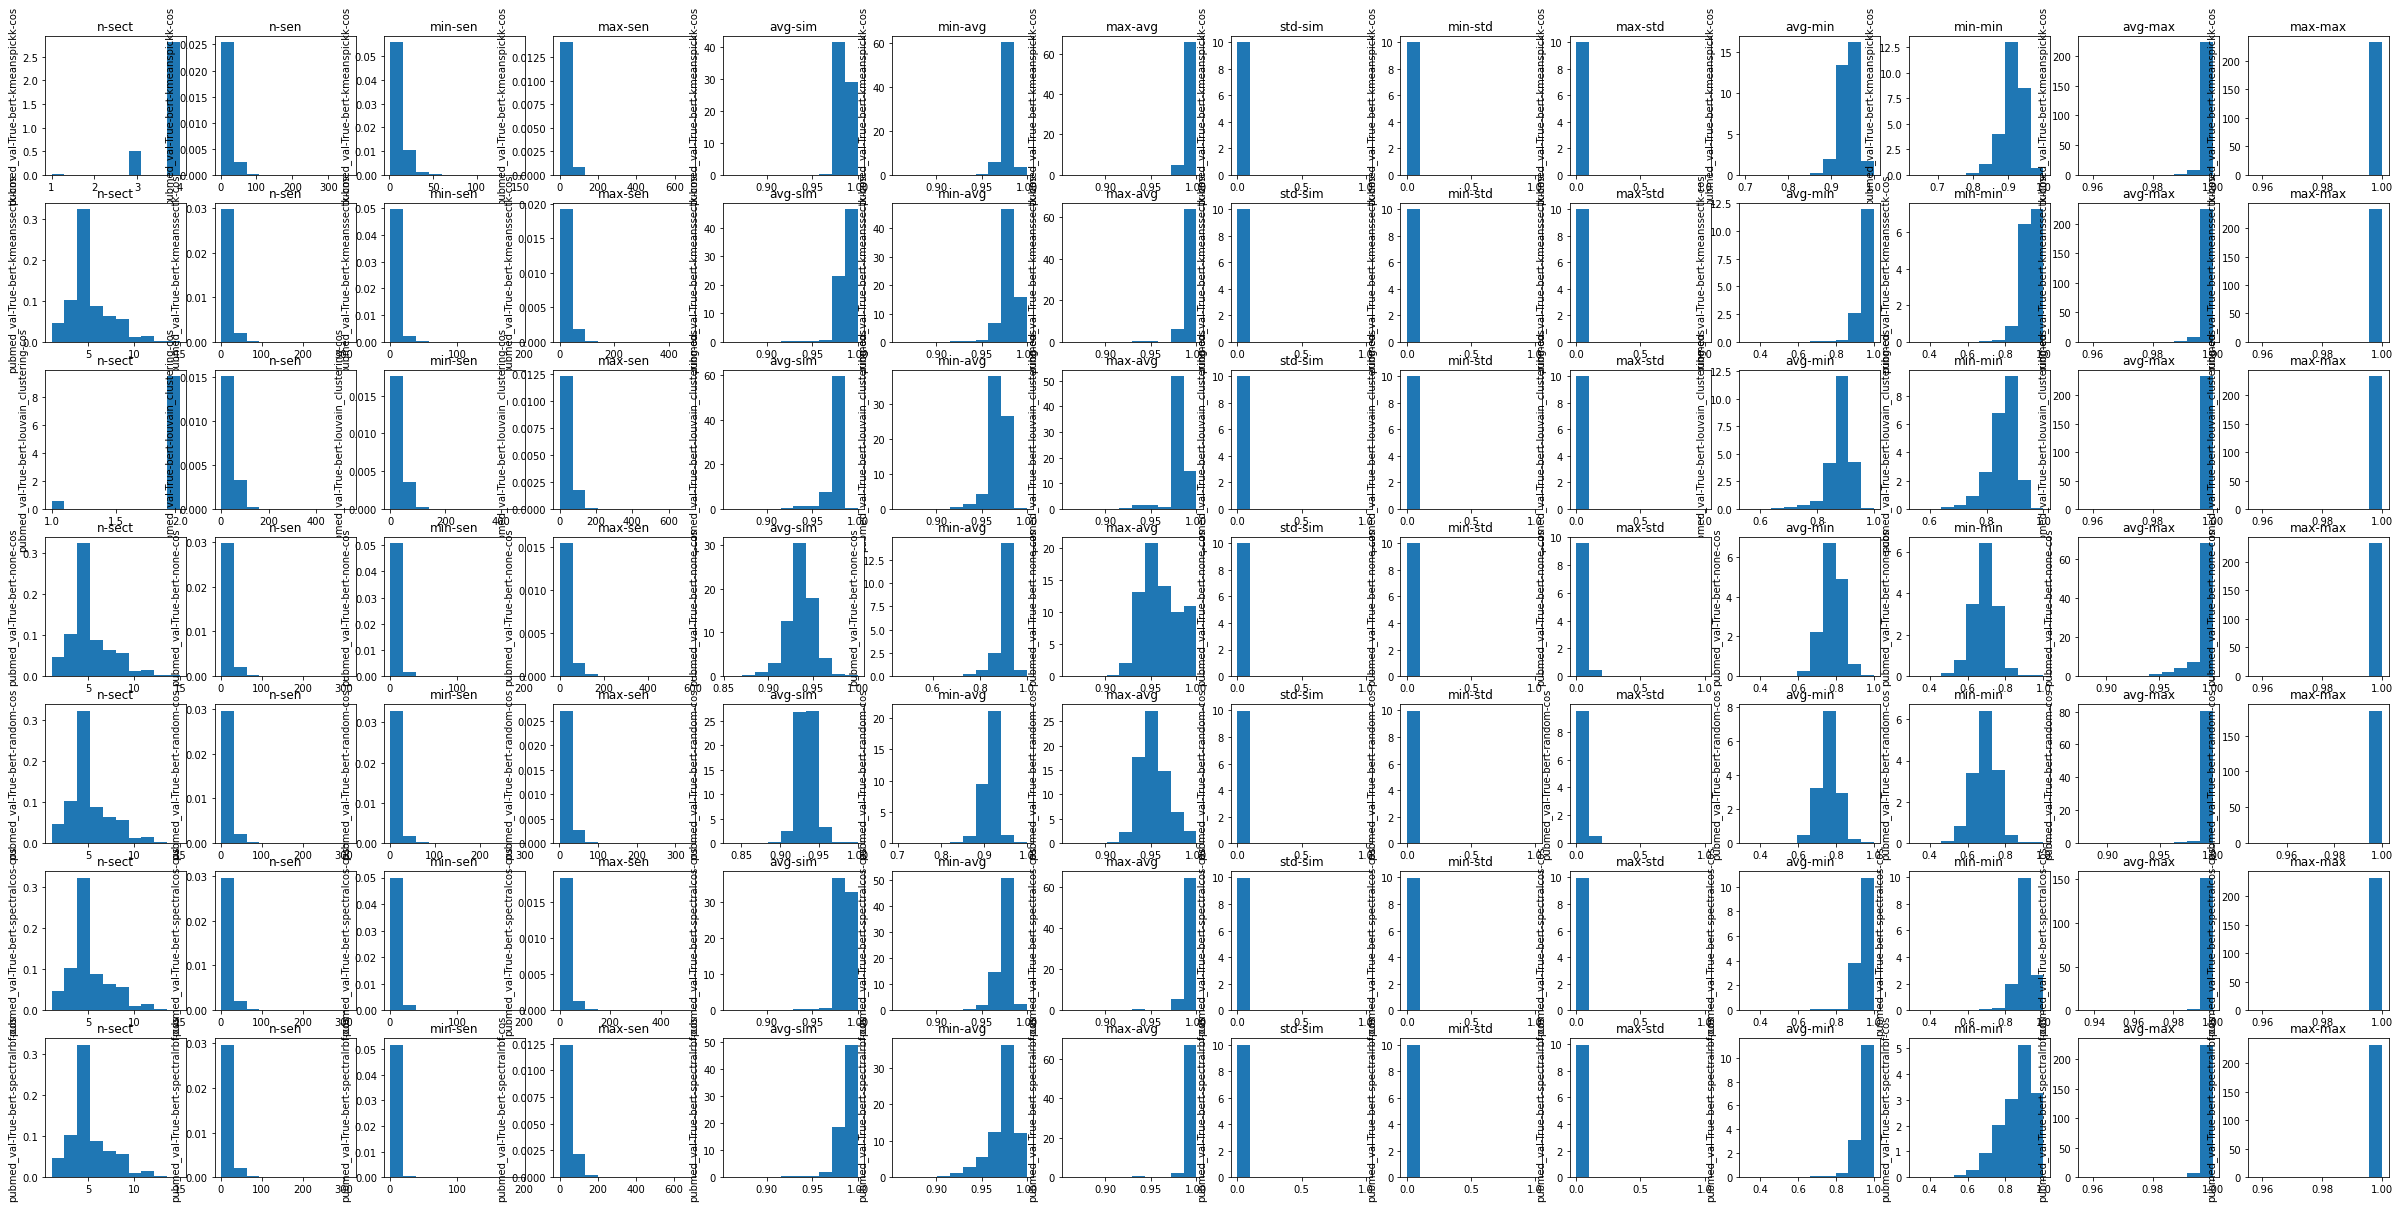

In [4]:
# plot histogram of each stat distribution
fig, axes = plt.subplots(len(stats), len(headers), figsize=(3 * len(headers), 3 * len(stats)))
for (k, v), ax in zip(stats.items(), axes):
    for h, i, a in zip(headers, v, ax):
        a.set_title(h)
        a.set_ylabel(k)
        a.hist(i, density=True)